In [ ]:
import nltk


In [ ]:

from nltk import sent_tokenize,word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re



In [ ]:
import tweepy as tw
import os

In [ ]:
consumer_key="6rxinKXyP6VvGaFmnAREQFof2"
consumer_secret="7aLKHEKhnvV4UBgsdxCGvDwSPKY4oyjGuqwvFTliLwGMmX8S7R"
access_token="1146317458153693185-PBHvJe0jzwFtzmhQkDhhZrvbYVlc5x"
access_token_secret="etV9YnJje8xieBY2ocVBBQX5lHYBduZ3RDO9AZDob8m3P"

In [ ]:
#calling OAuthHandler required for authentication with Twitter.

auth=tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [ ]:
#calling tw.API func. wait_on_rate_limit is required beacause twitter has set a limit
api=tw.API(auth,wait_on_rate_limit=True)

In [ ]:
search_word='Motera'
date_since='2021-02-01'

t=api.search(search_word,count=100)
t

[Status(_api=<tweepy.api.API object at 0x7f6eab4d7dd0>, _json={'created_at': 'Wed Mar 03 16:48:56 +0000 2021', 'id': 1367155040847208450, 'id_str': '1367155040847208450', 'text': 'RT @AabidMagami: ‘We won’t lose any cricket match as...’: Uddhav Thackeray’s dig over renaming of Motera stadium after PM Modi\n\n#blueJP', 'truncated': False, 'entities': {'hashtags': [{'text': 'blueJP', 'indices': [128, 135]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AabidMagami', 'name': 'Aabid Mir Magami عابد میر ماگامی (Athlete)', 'id': 162002753, 'id_str': '162002753', 'indices': [3, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1154766080918769664, 'id_str': '1154766080918769664', 'na

In [ ]:
#creating a tweepy itemiterator tweets for searching by calling tw.Cursor func,pulling only 1000 records.

tweets=tw.Cursor(api.search,q=search_word,lang='en',since=date_since).items(100)

In [ ]:
tweet_details=[[tweet.geo,tweet.text,tweet.user.screen_name,tweet.user.location]for tweet in tweets]


In [ ]:
tweet_details

[[None,
  'RT @AabidMagami: ‘We won’t lose any cricket match as...’: Uddhav Thackeray’s dig over renaming of Motera stadium after PM Modi\n\n#blueJP',
  'Elizatweetz',
  'West Bengal, India'],
 [None,
  "RT @ANI: We won’t lose any cricket match as name of stadium (Motera) has been changed to Narendra Modi stadium. We've named int'l airport a…",
  'muk_bhagat',
  ''],
 [None,
  'The last &amp; final #INDvENG Test begins at Motera tomrw. India need to win / draw this Test in order to qualify for F… https://t.co/6PQmmFEXIo',
  'Nikhil_Rams',
  'Mumbai'],
 [None,
  'RT @mufaddal_vohra: Tomorrow from 9.30am on Star Sports, the final Test match between India and England takes place at Motera Stadium. Indi…',
  'im_sathiskumar',
  'Coimbatore, India'],
 [None,
  "RT @ANI: We won’t lose any cricket match as name of stadium (Motera) has been changed to Narendra Modi stadium. We've named int'l airport a…",
  'iparthpatel',
  'Junagadh'],
 [None,
  'RT @Chandu7130: Maharashtra Chief Minister Uddh

In [ ]:
df = pd.DataFrame(tweet_details,columns=['geo','text','user','location'])
df

,geo,text,user,location
0,None,RT @AabidMagami: ‘We won’t lose any cricket ma...,Elizatweetz,"West Bengal, India"
1,None,RT @ANI: We won’t lose any cricket match as na...,muk_bhagat,
2,None,The last &amp; final #INDvENG Test begins at M...,Nikhil_Rams,Mumbai
3,None,RT @mufaddal_vohra: Tomorrow from 9.30am on St...,im_sathiskumar,"Coimbatore, India"
4,None,RT @ANI: We won’t lose any cricket match as na...,iparthpatel,Junagadh
...,...,...,...,...
95,None,@ESPNcricinfo Can we please blame the #Pitch h...,samirmaniar,"Charlotte, NC"
96,None,RT @ANI: We won’t lose any cricket match as na...,Fottato1,
97,None,RT @cricbuzz: 'A good defense can help you do ...,sampath533,"Hyderabad, India"
98,None,RT @mufaddal_vohra: Tomorrow from 9.30am on St...,45_balu,


In [ ]:
df.drop(['geo'],axis=1)


,text,user,location
0,RT @AabidMagami: ‘We won’t lose any cricket ma...,Elizatweetz,"West Bengal, India"
1,RT @ANI: We won’t lose any cricket match as na...,muk_bhagat,
2,The last &amp; final #INDvENG Test begins at M...,Nikhil_Rams,Mumbai
3,RT @mufaddal_vohra: Tomorrow from 9.30am on St...,im_sathiskumar,"Coimbatore, India"
4,RT @ANI: We won’t lose any cricket match as na...,iparthpatel,Junagadh
...,...,...,...
95,@ESPNcricinfo Can we please blame the #Pitch h...,samirmaniar,"Charlotte, NC"
96,RT @ANI: We won’t lose any cricket match as na...,Fottato1,
97,RT @cricbuzz: 'A good defense can help you do ...,sampath533,"Hyderabad, India"
98,RT @mufaddal_vohra: Tomorrow from 9.30am on St...,45_balu,


In [ ]:
df1=df['text']
df1

0     RT @AabidMagami: ‘We won’t lose any cricket ma...
1     RT @ANI: We won’t lose any cricket match as na...
2     The last &amp; final #INDvENG Test begins at M...
3     RT @mufaddal_vohra: Tomorrow from 9.30am on St...
4     RT @ANI: We won’t lose any cricket match as na...
                            ...                        
95    @ESPNcricinfo Can we please blame the #Pitch h...
96    RT @ANI: We won’t lose any cricket match as na...
97    RT @cricbuzz: 'A good defense can help you do ...
98    RT @mufaddal_vohra: Tomorrow from 9.30am on St...
99    RT @ANI: We won’t lose any cricket match as na...
Name: text, Length: 100, dtype: object

In [ ]:
all_sentences=[]
for word in df1:
    all_sentences.append(word)

In [ ]:
all_sentences

['RT @AabidMagami: ‘We won’t lose any cricket match as...’: Uddhav Thackeray’s dig over renaming of Motera stadium after PM Modi\n\n#blueJP',
 "RT @ANI: We won’t lose any cricket match as name of stadium (Motera) has been changed to Narendra Modi stadium. We've named int'l airport a…",
 'The last &amp; final #INDvENG Test begins at Motera tomrw. India need to win / draw this Test in order to qualify for F… https://t.co/6PQmmFEXIo',
 'RT @mufaddal_vohra: Tomorrow from 9.30am on Star Sports, the final Test match between India and England takes place at Motera Stadium. Indi…',
 "RT @ANI: We won’t lose any cricket match as name of stadium (Motera) has been changed to Narendra Modi stadium. We've named int'l airport a…",
 'RT @Chandu7130: Maharashtra Chief Minister Uddhav Thackeray is angry at the name of Motera Stadium in Ahmedabad to Narendra Modi.😡😡\n#उद्धव_…',
 'RT @cricbuzz: Varun Chakravarthy, who had been asked to head to Motera after failing his fitness test, has been called back to

In [ ]:
lines=list()
for line in all_sentences:
    words=line.split()
    for w in words:
        lines.append(w)

In [ ]:
lines

['RT',
 '@AabidMagami:',
 '‘We',
 'won’t',
 'lose',
 'any',
 'cricket',
 'match',
 'as...’:',
 'Uddhav',
 'Thackeray’s',
 'dig',
 'over',
 'renaming',
 'of',
 'Motera',
 'stadium',
 'after',
 'PM',
 'Modi',
 '#blueJP',
 'RT',
 '@ANI:',
 'We',
 'won’t',
 'lose',
 'any',
 'cricket',
 'match',
 'as',
 'name',
 'of',
 'stadium',
 '(Motera)',
 'has',
 'been',
 'changed',
 'to',
 'Narendra',
 'Modi',
 'stadium.',
 "We've",
 'named',
 "int'l",
 'airport',
 'a…',
 'The',
 'last',
 '&amp;',
 'final',
 '#INDvENG',
 'Test',
 'begins',
 'at',
 'Motera',
 'tomrw.',
 'India',
 'need',
 'to',
 'win',
 '/',
 'draw',
 'this',
 'Test',
 'in',
 'order',
 'to',
 'qualify',
 'for',
 'F…',
 'https://t.co/6PQmmFEXIo',
 'RT',
 '@mufaddal_vohra:',
 'Tomorrow',
 'from',
 '9.30am',
 'on',
 'Star',
 'Sports,',
 'the',
 'final',
 'Test',
 'match',
 'between',
 'India',
 'and',
 'England',
 'takes',
 'place',
 'at',
 'Motera',
 'Stadium.',
 'Indi…',
 'RT',
 '@ANI:',
 'We',
 'won’t',
 'lose',
 'any',
 'cricket',
 'm

In [ ]:
##Removing punctuations
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [ ]:
lines2

['RT',
 'AabidMagami',
 'We',
 'wont',
 'lose',
 'any',
 'cricket',
 'match',
 'as',
 'Uddhav',
 'Thackerays',
 'dig',
 'over',
 'renaming',
 'of',
 'Motera',
 'stadium',
 'after',
 'PM',
 'Modi',
 'blueJP',
 'RT',
 'ANI',
 'We',
 'wont',
 'lose',
 'any',
 'cricket',
 'match',
 'as',
 'name',
 'of',
 'stadium',
 'Motera',
 'has',
 'been',
 'changed',
 'to',
 'Narendra',
 'Modi',
 'stadium',
 'Weve',
 'named',
 'intl',
 'airport',
 'a',
 'The',
 'last',
 'amp',
 'final',
 'INDvENG',
 'Test',
 'begins',
 'at',
 'Motera',
 'tomrw',
 'India',
 'need',
 'to',
 'win',
 'draw',
 'this',
 'Test',
 'in',
 'order',
 'to',
 'qualify',
 'for',
 'F',
 'httpstco6PQmmFEXIo',
 'RT',
 'mufaddalvohra',
 'Tomorrow',
 'from',
 '930am',
 'on',
 'Star',
 'Sports',
 'the',
 'final',
 'Test',
 'match',
 'between',
 'India',
 'and',
 'England',
 'takes',
 'place',
 'at',
 'Motera',
 'Stadium',
 'Indi',
 'RT',
 'ANI',
 'We',
 'wont',
 'lose',
 'any',
 'cricket',
 'match',
 'as',
 'name',
 'of',
 'stadium',
 'Mo

In [ ]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer
# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
print(stem)

['rt', 'aabidmagami', 'we', 'wont', 'lose', 'ani', 'cricket', 'match', 'as', 'uddhav', 'thackeray', 'dig', 'over', 'renam', 'of', 'motera', 'stadium', 'after', 'pm', 'modi', 'bluejp', 'rt', 'ani', 'we', 'wont', 'lose', 'ani', 'cricket', 'match', 'as', 'name', 'of', 'stadium', 'motera', 'has', 'been', 'chang', 'to', 'narendra', 'modi', 'stadium', 'weve', 'name', 'intl', 'airport', 'a', 'the', 'last', 'amp', 'final', 'indveng', 'test', 'begin', 'at', 'motera', 'tomrw', 'india', 'need', 'to', 'win', 'draw', 'this', 'test', 'in', 'order', 'to', 'qualifi', 'for', 'f', 'httpstco6pqmmfexio', 'rt', 'mufaddalvohra', 'tomorrow', 'from', '930am', 'on', 'star', 'sport', 'the', 'final', 'test', 'match', 'between', 'india', 'and', 'england', 'take', 'place', 'at', 'motera', 'stadium', 'indi', 'rt', 'ani', 'we', 'wont', 'lose', 'ani', 'cricket', 'match', 'as', 'name', 'of', 'stadium', 'motera', 'has', 'been', 'chang', 'to', 'narendra', 'modi', 'stadium', 'weve', 'name', 'intl', 'airport', 'a', 'rt', 

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
punct =string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in punct:
        if word not in stop_words:
             stem2.append(word)

print(stem2)

['rt', 'aabidmagami', 'wont', 'lose', 'ani', 'cricket', 'match', 'uddhav', 'thackeray', 'dig', 'renam', 'motera', 'stadium', 'pm', 'modi', 'bluejp', 'rt', 'ani', 'wont', 'lose', 'ani', 'cricket', 'match', 'name', 'stadium', 'motera', 'chang', 'narendra', 'modi', 'stadium', 'weve', 'name', 'intl', 'airport', 'last', 'amp', 'final', 'indveng', 'test', 'begin', 'motera', 'tomrw', 'india', 'need', 'win', 'draw', 'test', 'order', 'qualifi', 'f', 'httpstco6pqmmfexio', 'rt', 'mufaddalvohra', 'tomorrow', '930am', 'star', 'sport', 'final', 'test', 'match', 'india', 'england', 'take', 'place', 'motera', 'stadium', 'indi', 'rt', 'ani', 'wont', 'lose', 'ani', 'cricket', 'match', 'name', 'stadium', 'motera', 'chang', 'narendra', 'modi', 'stadium', 'weve', 'name', 'intl', 'airport', 'rt', 'chandu7130', 'maharashtra', 'chief', 'minist', 'uddhav', 'thackeray', 'angri', 'name', 'motera', 'stadium', 'ahmedabad', 'narendra', 'modi', 'rt', 'cricbuzz', 'varun', 'chakravarthi', 'ask', 'head', 'motera', 'fai

In [ ]:
df2 = pd.DataFrame(stem2)

In [ ]:
df2=df2.value_counts(ascending=False)

In [ ]:
df2.head(10)

stadium    105
motera      96
rt          89
ani         82
name        71
match       64
modi        53
cricket     48
lose        47
wont        47
dtype: int64

In [ ]:
#This will give frequencies of our words

from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df2:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 72,
          2: 27,
          3: 9,
          4: 1,
          5: 3,
          7: 2,
          8: 8,
          9: 1,
          10: 10,
          14: 4,
          15: 2,
          16: 7,
          17: 3,
          18: 1,
          19: 1,
          20: 2,
          33: 4,
          39: 1,
          41: 1,
          47: 2,
          48: 1,
          53: 1,
          64: 1,
          71: 1,
          82: 1,
          89: 1,
          96: 1,
          105: 1})

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
word_count = [len(sentence.split()) for sentence in df1] 
word_count

[21,
 25,
 25,
 22,
 25,
 21,
 25,
 25,
 25,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 22,
 22,
 21,
 25,
 15,
 22,
 22,
 21,
 25,
 21,
 21,
 25,
 19,
 22,
 21,
 22,
 21,
 22,
 21,
 24,
 21,
 25,
 21,
 22,
 22,
 23,
 21,
 25,
 21,
 20,
 22,
 21,
 25,
 21,
 23,
 25,
 25,
 19,
 24,
 22,
 22,
 22,
 25,
 18,
 24,
 21,
 25,
 24,
 25,
 21,
 19,
 25,
 21,
 25,
 22,
 25,
 21,
 25,
 25,
 25,
 22,
 25,
 24,
 25,
 22,
 25,
 25,
 25,
 13,
 25,
 25,
 22,
 21,
 25,
 24,
 25,
 24,
 25,
 16,
 25,
 24,
 22,
 25]

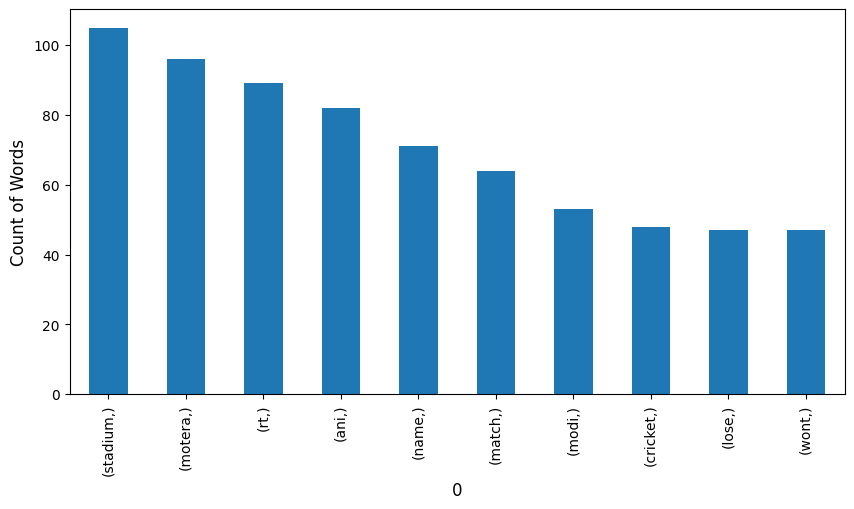

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Word from Tweet', fontsize=12)
plt.ylabel('Count of Words', fontsize=12)
df2.head(10).plot(kind='bar')